# Dynamic WSCC 9-bus System with Switch

In [2]:
%%bash
TOP=${TOP:-$(git rev-parse --show-toplevel)}
PATH=${TOP}/build/Examples/Cxx

WSCC-9bus_CIM_Dyn_Switch ${TOP}/Examples/CIM/WSCC-09_RX_Dyn/*.xml

CIMContentHandler: Note: 0 out of 492 tasks remain unresolved!
0.2001: Handle event


In [1]:
import villas.dataprocessing.readtools as rt
import villas.dataprocessing.plottools as pt
from villas.dataprocessing.timeseries import TimeSeries as ts
import matplotlib.pyplot as plt

## Simulation

In [2]:
path = 'logs/WSCC-9bus_dyn_switch/'
logName = 'WSCC-9bus_dyn_switch'
logFilename = path + logName + '.csv'
print(logFilename)

ts_dpsim = rt.read_timeseries_dpsim(logFilename)
phasors = ts.phasors(ts_dpsim)

logs/WSCC-9bus_dyn_switch/WSCC-9bus_dyn_switch.csv
column number: 12
results length: 20001
real column names: ['wr_1', 'wr_2', 'wr_3']
complex column names: ['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9']


### Phasors at last time step in per unit

In [3]:
nominal_voltages = {'v1': 16500, 'v2': 18000, 'v3': 13800, 
                         'v4': 230000, 'v5': 230000, 'v6': 230000, 
                         'v7': 230000, 'v8': 230000, 'v9': 230000} 
for node, nom_voltage in nominal_voltages.items():
    print(node + ': ' + str(phasors[node]['abs'].values[0] / nom_voltage) + '<' + str(phasors[node]['phase'].values[0]))

v1: 1.0399681262266387<-0.014699743011457765
v2: 1.024919601086771<9.668743975014822
v3: 1.0249274588521329<4.857472443150111
v4: 0.9957554231477036<-2.3268246922381244
v5: 0.9506277362549715<-4.1625088619510064
v6: 0.9661595673114287<-3.761448716726419
v7: 0.9973750905317386<3.9473090824356283
v8: 0.9790808982669627<0.8091667287080271
v9: 1.0041051096197608<2.081344038148706


### Plot node voltages

(0, 240000)

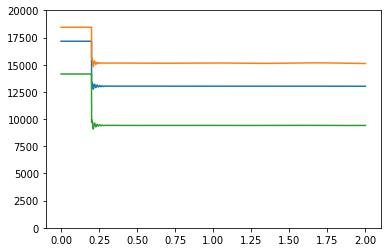

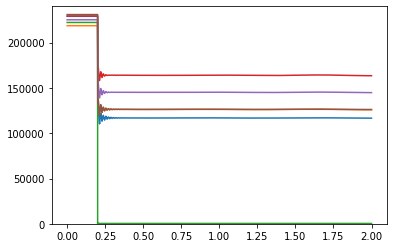

In [4]:
plt.plot(phasors['v1']['abs'].time, phasors['v1']['abs'].values)
plt.plot(phasors['v2']['abs'].time, phasors['v2']['abs'].values)
plt.plot(phasors['v3']['abs'].time, phasors['v3']['abs'].values)
plt.ylim([0,20000])

plt.figure()
plt.plot(phasors['v4']['abs'].time, phasors['v4']['abs'].values)
plt.plot(phasors['v5']['abs'].time, phasors['v5']['abs'].values)
plt.plot(phasors['v6']['abs'].time, phasors['v6']['abs'].values)
plt.plot(phasors['v7']['abs'].time, phasors['v7']['abs'].values)
plt.plot(phasors['v8']['abs'].time, phasors['v8']['abs'].values)
plt.plot(phasors['v9']['abs'].time, phasors['v9']['abs'].values)
plt.ylim([0,240000])

### Generator Speed

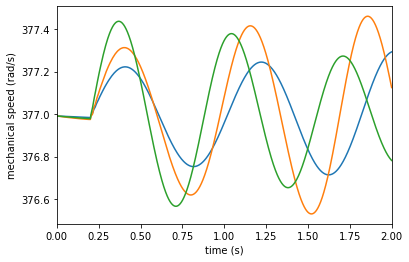

In [5]:
plt.plot(ts_dpsim['wr_1'].time, ts_dpsim['wr_1'].values)
plt.plot(ts_dpsim['wr_2'].time, ts_dpsim['wr_2'].values)
plt.plot(ts_dpsim['wr_3'].time, ts_dpsim['wr_3'].values)
plt.xlabel('time (s)')
plt.ylabel('mechanical speed (rad/s)')
plt.xlim([0,2])
#plt.savefig('wscc_9bus_fault_gen_speed.pdf')

## Validation

In [6]:
# read Simulink log file
import os
import urllib.request

if not os.path.exists('reference-results'):
    os.mkdir('reference-results')

url = 'https://git.rwth-aachen.de/acs/public/simulation/dpsim-results/raw/master/WSCC-9bus/WSCC-9bus_dyn_switch_mod_inertia.csv'
local_file = 'reference-results/WSCC-9bus_dyn_switch.csv'
urllib.request.urlretrieve(url, local_file) 

ts_sl = rt.read_timeseries_simulink(local_file)

column number: 12
results length: 20001
real column names: ['wr_1', 'wr_2', 'wr_3']
complex column names: ['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9']


In [7]:
import numpy as np
assert np.all(ts_sl['wr_1'].values - ts_dpsim['wr_1'].values < 0.001)